In [280]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 


In [281]:
df= pd.read_csv('Healthcare-Diabetes.csv')

In [282]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [283]:
df.tail()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1
2767,2768,2,81,72,15,76,30.1,0.547,25,0


In [284]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [285]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

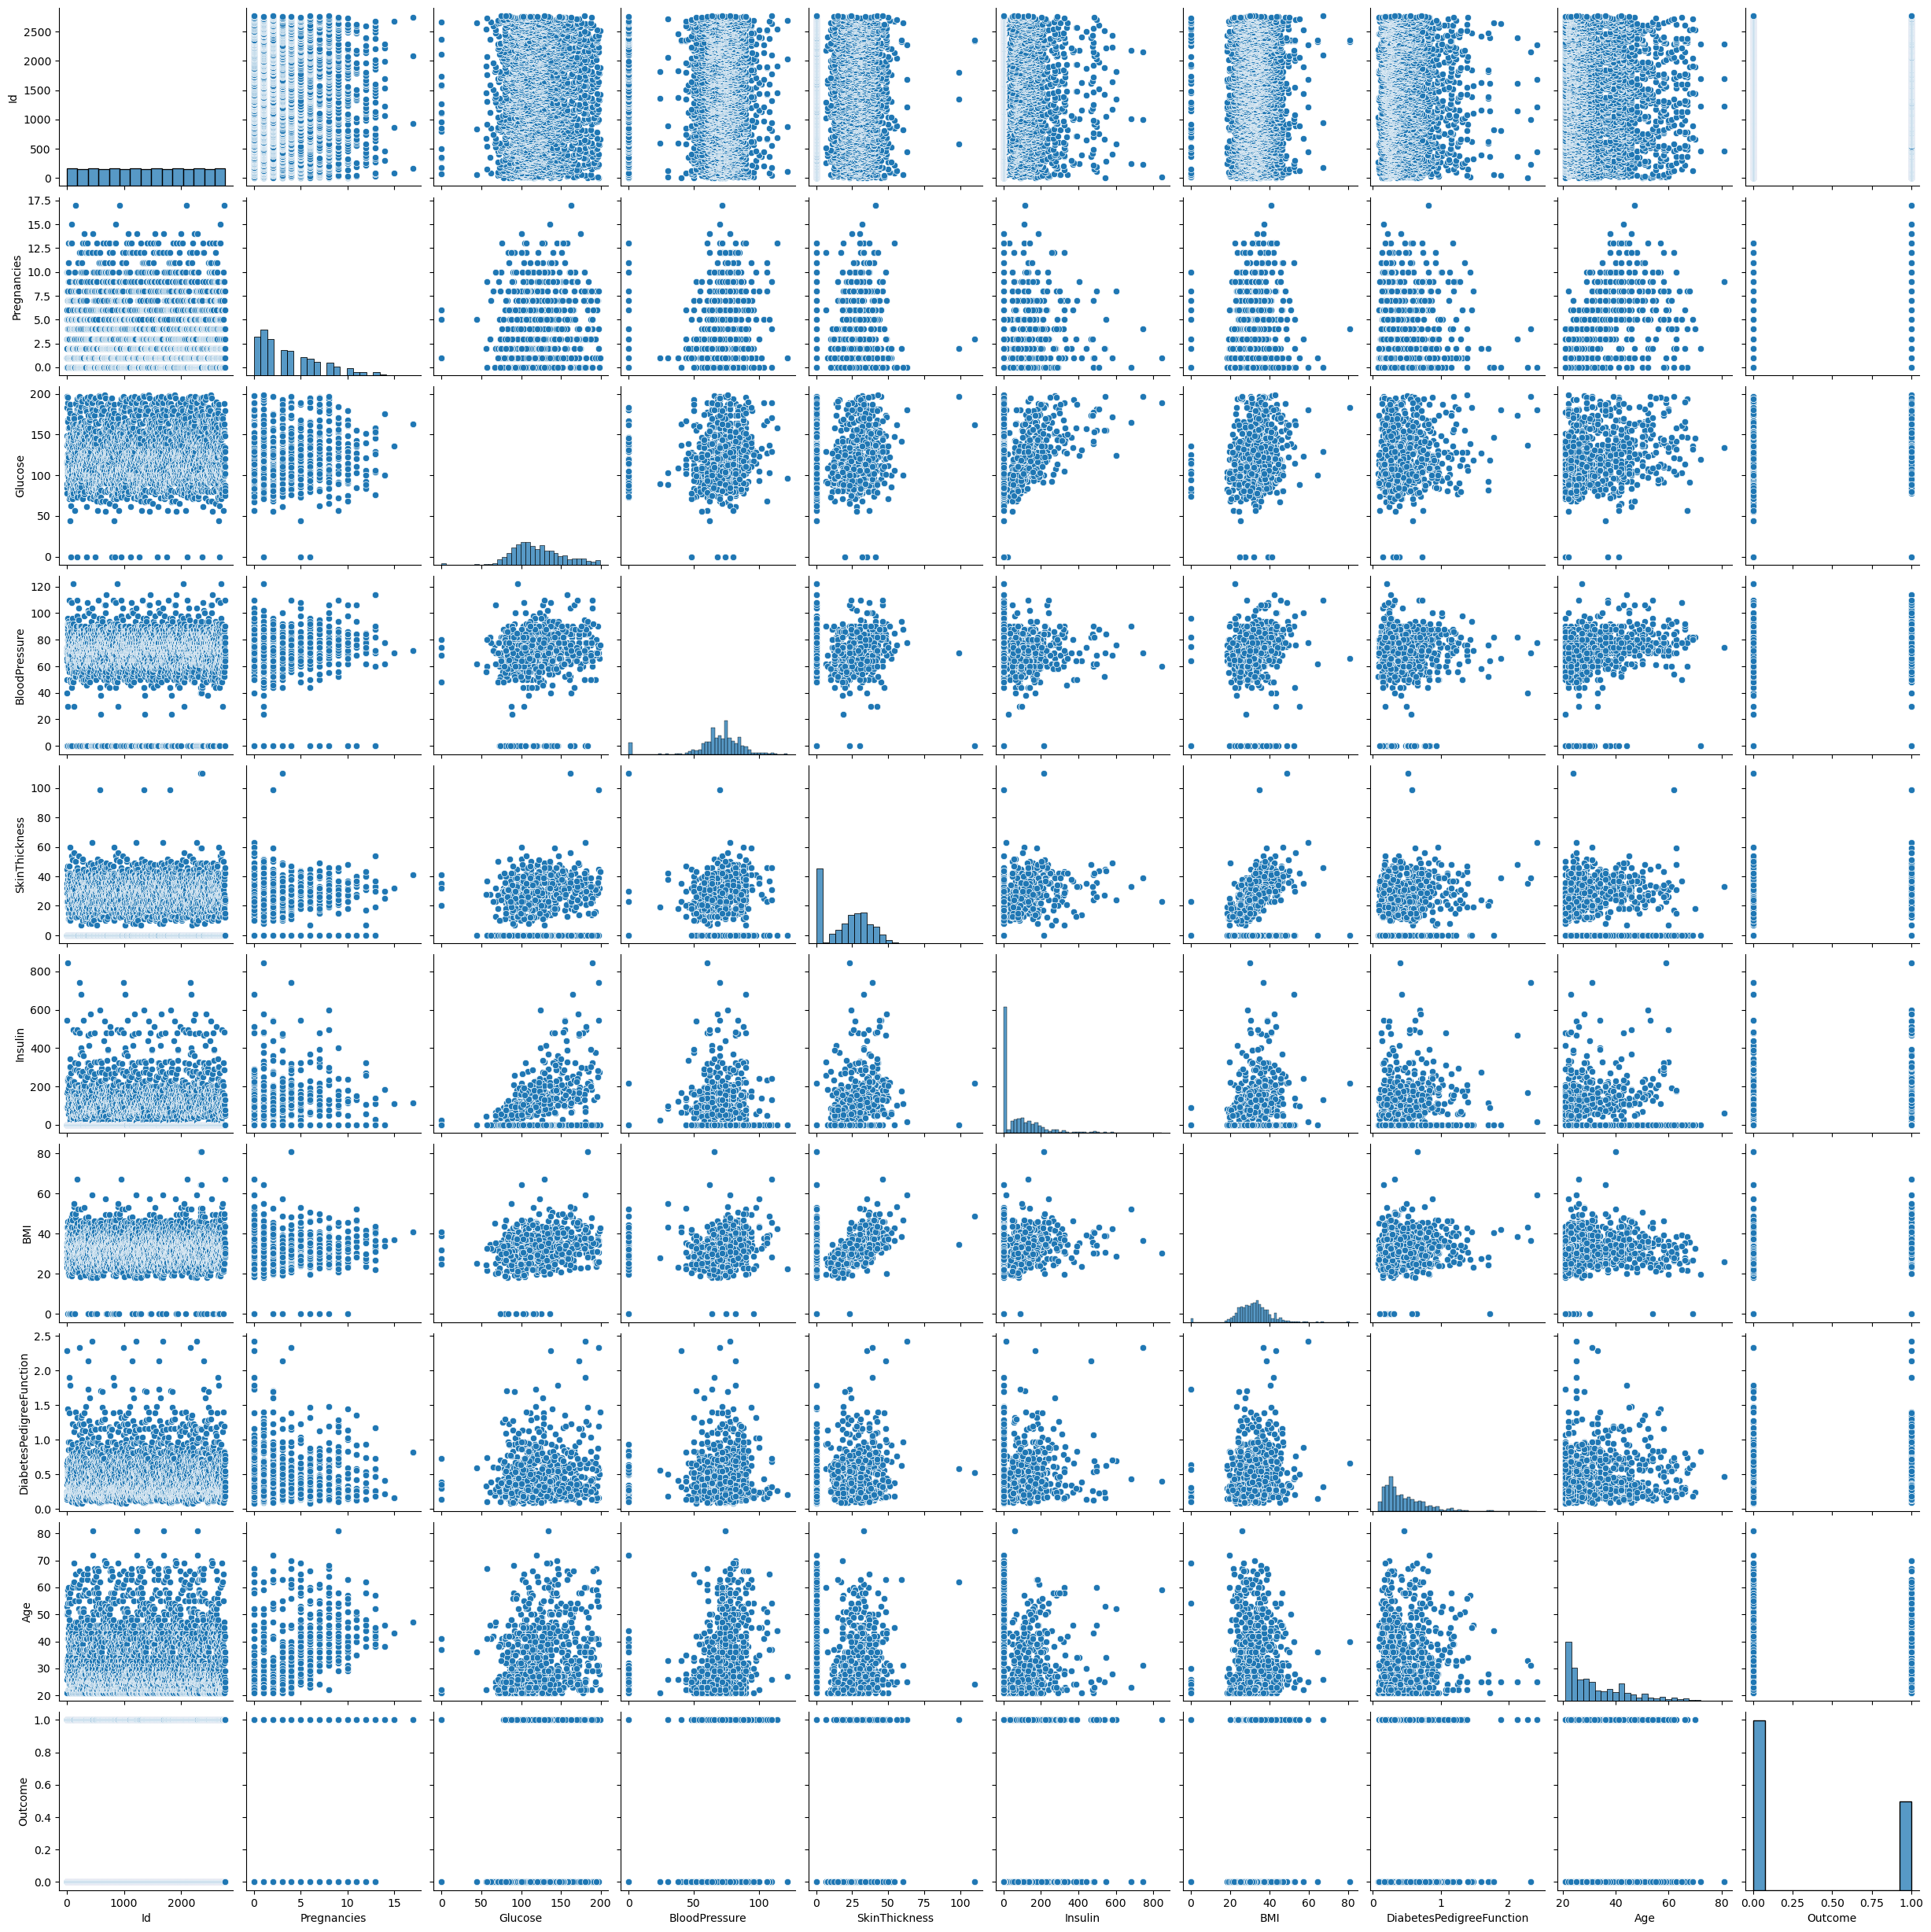

In [286]:
sns.pairplot(df)

In [287]:
df.shape

(2768, 10)

In [288]:
matrix = df.corr()
print(matrix)

                                Id  Pregnancies   Glucose  BloodPressure  \
Id                        1.000000    -0.024222  0.015010       0.009717   
Pregnancies              -0.024222     1.000000  0.122839       0.147253   
Glucose                   0.015010     0.122839  1.000000       0.142095   
BloodPressure             0.009717     0.147253  0.142095       1.000000   
SkinThickness             0.017702    -0.068673  0.061023       0.201167   
Insulin                   0.007359    -0.075734  0.323445       0.087823   
BMI                       0.024007     0.018761  0.225308       0.281560   
DiabetesPedigreeFunction -0.009695    -0.027731  0.127195       0.048471   
Age                      -0.007404     0.540805  0.256958       0.238684   
Outcome                  -0.006298     0.223796  0.460644       0.072900   

                          SkinThickness   Insulin       BMI  \
Id                             0.017702  0.007359  0.024007   
Pregnancies                   -0.0686

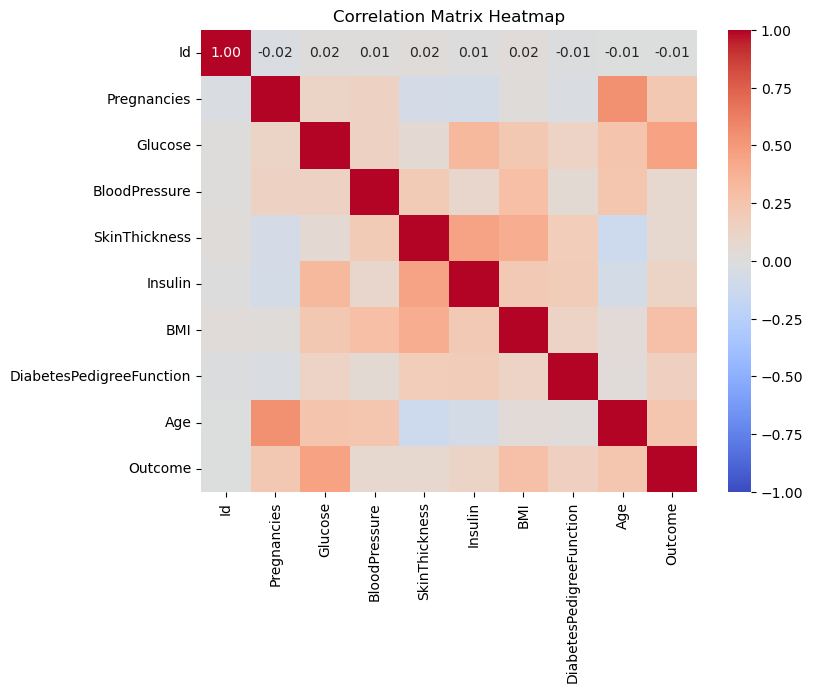

In [289]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [290]:
print(df.dtypes)

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [291]:
threshold = 0.1
correlated_cols = matrix.loc[(matrix['Outcome'].abs() > threshold) & (matrix.index != 'Outcome'), 'Outcome'].index
print(correlated_cols)

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age'],
      dtype='object')


In [292]:
correlated_cols=list(correlated_cols) + ['Outcome']
print(correlated_cols)

['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [293]:
df = df[correlated_cols]

In [294]:
df

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...
2763,2,75,55,29.7,0.370,33,0
2764,8,179,130,32.7,0.719,36,1
2765,6,85,0,31.2,0.382,42,0
2766,0,129,130,67.1,0.319,26,1


In [295]:
checkpoint=int(df.shape[0]*(80/100))

In [296]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = StandardScaler()

In [297]:

df = scaler.fit_transform(df)

In [298]:
df

array([[ 0.67923239,  0.83973755, -0.71363302, ...,  0.47850939,
         1.43249494,  1.38114555],
       [-0.82534128, -1.12712422, -0.71363302, ..., -0.36913043,
        -0.18107914, -0.72403665],
       [ 1.28106186,  1.93243853, -0.71363302, ...,  0.61671153,
        -0.09615419,  1.38114555],
       ...,
       [ 0.67923239, -1.12712422, -0.71363302, ..., -0.2739245 ,
         0.75309532, -0.72403665],
       [-1.12625601,  0.24655701,  0.44416975, ..., -0.4674075 ,
        -0.6057039 ,  1.38114555],
       [-0.52442655, -1.25200433, -0.03676371, ...,  0.23281669,
        -0.69062885, -0.72403665]])

In [299]:
print(df.shape)


(2768, 7)


In [300]:
class DiabeticsDataset(Dataset):
    def __init__(self,X):
        self.X=torch.tensor(X,dtype=torch.float32)
    def __len__(self):
        return len(self.X)
    def __getitem__(self,index):
        return self.X[index]
        

In [301]:
trainData=df[0:checkpoint]
testData=df[checkpoint:]

In [302]:
trainData=torch.tensor(trainData, dtype=torch.float32)
testData=torch.tensor(testData, dtype=torch.float32)

In [303]:
trainLoader=DataLoader(trainData,batch_size=16,shuffle=True)
testLoader=DataLoader(testData,batch_size=16)

In [304]:

class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(7, 16),
            nn.ReLU(),
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Dropout(0.5),  
            nn.Linear(64, 128)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.5),  # Use nn.Dropout for dropout layers
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16, 7)
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
        

In [305]:
model = AutoEncoder()

In [306]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)


In [307]:
criterion=nn.MSELoss()

In [308]:
epochs=20
losses_epoch=[]
for epoch in range(epochs):
    for input in trainLoader:
        predictedInput=model(input)
        loss=criterion(input,predictedInput)
        losses_epoch.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch: {epoch+1} \tLoss: {np.mean(losses_epoch)}")  

Epoch: 1 	Loss: 0.7916587076598792
Epoch: 2 	Loss: 0.6672276252036472
Epoch: 3 	Loss: 0.5906047705266115
Epoch: 4 	Loss: 0.5412368907613291
Epoch: 5 	Loss: 0.5035585764286329
Epoch: 6 	Loss: 0.4766881057648636
Epoch: 7 	Loss: 0.4552055627475172
Epoch: 8 	Loss: 0.43799681701570103
Epoch: 9 	Loss: 0.42447781469896256
Epoch: 10 	Loss: 0.4129095341983459
Epoch: 11 	Loss: 0.40372227281429474
Epoch: 12 	Loss: 0.39503019578236753
Epoch: 13 	Loss: 0.3879773255105697
Epoch: 14 	Loss: 0.3806577367901435
Epoch: 15 	Loss: 0.3746677704637857
Epoch: 16 	Loss: 0.3694408086041431
Epoch: 17 	Loss: 0.36431649416193235
Epoch: 18 	Loss: 0.360078848576803
Epoch: 19 	Loss: 0.355720418628442
Epoch: 20 	Loss: 0.3518569704091592


In [317]:
loss_for_reconstruction=[]
with torch.no_grad():
    for input in trainLoader:
        predictedInput=model(input)
        loss=criterion(input,predictedInput)
        loss_for_reconstruction.append(loss.item())
mean=np.mean(loss_for_reconstruction)
std=np.std(loss_for_reconstruction)
threshold=mean+1.5*std

In [321]:
count=0
anomalies_new=[]
with torch.no_grad():
    for input in testLoader:
        predictedInput=model(input)
        loss=criterion(input,predictedInput)
        
        if(loss>threshold):
            print(f"Anomaly at {input}")
            anomalies_new.append(input.numpy())
            count+=1
            

Anomaly at tensor([[-1.1263,  0.6212, -0.7136,  1.2710, -0.8175, -0.3509,  1.3811],
        [ 2.4847,  0.5900, -0.7136,  0.6517, -0.6977,  0.6682, -0.7240],
        [ 0.3783,  0.8085, -0.7136, -0.2771, -0.1142, -0.4359, -0.7240],
        [-0.8253, -0.7525, -0.7136, -1.7261, -0.9956, -1.0303, -0.7240],
        [ 0.6792, -0.4403, -0.7136,  0.5774,  0.7856, -0.1811, -0.7240],
        [-1.1263,  2.1198, -0.7136,  0.2678, -0.1112,  0.6682,  1.3811],
        [-0.5244, -1.1896, -0.2683,  0.0078,  0.0793, -0.9454, -0.7240],
        [ 0.0774, -0.1281,  0.3551,  0.1316, -0.7407, -0.7756, -0.7240],
        [ 1.2811, -0.4091, -0.7136, -0.2028,  1.4858, -0.0112,  1.3811],
        [ 0.0774, -0.1281, -0.7136, -0.3019, -0.2801, -0.2660,  1.3811],
        [-1.1263,  1.8388, -0.5889,  3.3763,  5.9851, -0.6906,  1.3811],
        [-0.8253, -0.6588, -0.0902, -0.8468,  0.5737, -0.4359, -0.7240],
        [-1.1263, -0.8149,  0.1057,  0.5403, -0.4336, -0.6057, -0.7240],
        [-1.1263, -0.5339, -0.1436,  0.1

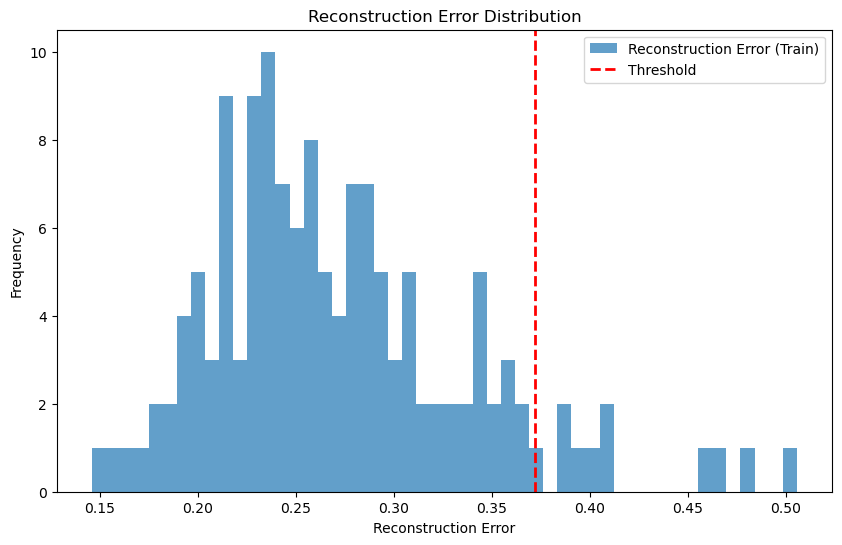

In [324]:
import matplotlib.pyplot as plt

# Plot reconstruction errors
plt.figure(figsize=(10, 6))
plt.hist(loss_for_reconstruction, bins=50, alpha=0.7, label='Reconstruction Error (Train)')
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2, label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution')
plt.legend()
plt.show()